In [1]:
import pandas as pd
hr = pd.read_csv('datasets_9768_13874_HR_comma_sep.csv')
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [2]:
import pandas as pd
hr = pd.read_csv('datasets_9768_13874_HR_comma_sep.csv')
col_names = hr.columns.tolist()     #dataset column print   
print("Column names:")
print(col_names)
print("\nSample data:")             #dataset data print
hr.head(5)                           

Column names:
['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years', 'sales', 'salary']

Sample data:


,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [3]:
hr.shape                 #14999 employee data and 10 feature data divide

(14999, 10)

In [4]:
hr.dtypes                      #print Datatype

satisfaction_level       float64
last_evaluation          float64
number_project             int64
average_montly_hours       int64
time_spend_company         int64
Work_accident              int64
left                       int64
promotion_last_5years      int64
sales                     object
salary                    object
dtype: object

In [5]:
hr.isnull().sum()            #check missing value

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

In [6]:
hr=hr.rename(columns = {'sales':'department'}) # sales column rename as department

In [7]:
hr

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [8]:
hr['department'].unique()       #check department value 

array(['sales', 'accounting', 'hr', 'technical', 'support', 'management',
       'IT', 'product_mng', 'marketing', 'RandD'], dtype=object)

In [9]:
import numpy as np
hr['department']=np.where(hr['department'] == 'support', 'technical', hr['department'])    # merge technical and support
hr['department']=np.where(hr['department'] == 'IT', 'technical', hr['department'])         # merge  IT and technical


In [10]:
hr['left'].value_counts()   # 0-stayed company and 1-left company 

0    11428
1     3571
Name: left, dtype: int64

Text(0, 0.5, 'Number Of Employee')

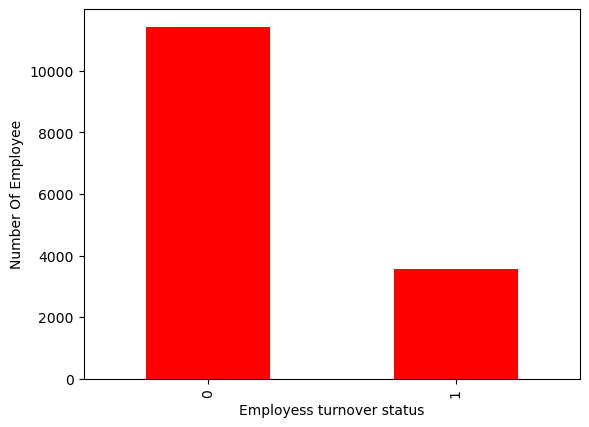

In [11]:
import matplotlib.pyplot as plt 
hr['left'].value_counts().plot(kind='bar',color='r')
plt.xlabel('Employess turnover status')
plt.ylabel('Number Of Employee')

#Creating Variables for Categorical Variables

In [12]:
cat_vars=['department','salary']            # more unique value and object type of value to convert salary,department to assign dummy variale 
for var in cat_vars:
    cat_list='var'+'_'+var
    cat_list = pd.get_dummies(hr[var], prefix=var)
    hr1=hr.join(cat_list)
    hr=hr1

In [13]:
hr.drop(hr.columns[[8, 9]], axis=1, inplace=True)
hr.columns.values

array(['satisfaction_level', 'last_evaluation', 'number_project',
       'average_montly_hours', 'time_spend_company', 'Work_accident',
       'left', 'promotion_last_5years', 'department_RandD',
       'department_accounting', 'department_hr', 'department_management',
       'department_marketing', 'department_product_mng',
       'department_sales', 'department_technical', 'salary_high',
       'salary_low', 'salary_medium'], dtype=object)

# The outcome variable is “left”, and all the other variables are predictors

In [14]:
hr_vars=hr.columns.values.tolist()
y=['left']
X=[i for i in hr_vars if i not in y]

In [15]:
cols=['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low']   #This are the value best prediction
X=hr[cols]
y=hr['left']

# split Data Train And Test

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print('Shape of X_train= ',X_train.shape)
print('Shape of y_train= ',y_train.shape)
print('Shape of X_test= ',X_test.shape)
print('Shape of y_test= ',y_test.shape)

Shape of X_train=  (10499, 10)
Shape of y_train=  (10499,)
Shape of X_test=  (4500, 10)
Shape of y_test=  (4500,)


# feature Scaling

In [17]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(X_train)
sc.transform(X_train)
sc.transform(X_test)

array([[-0.69569117, -0.86482971, -0.34290478, ..., -0.21112243,
        -0.29850944, -0.97525603],
       [-0.25239796,  1.42018977, -0.34290478, ..., -0.21112243,
        -0.29850944, -0.97525603],
       [ 0.43269154, -0.27892728, -1.0336487 , ...,  4.73658821,
        -0.29850944, -0.97525603],
       ...,
       [ 0.95658351, -0.80623947,  0.34783914, ..., -0.21112243,
        -0.29850944, -0.97525603],
       [-0.29269734, -0.45469801, -1.0336487 , ..., -0.21112243,
        -0.29850944, -0.97525603],
       [-1.78377449,  0.24838491,  1.03858306, ..., -0.21112243,
        -0.29850944,  1.02537177]])

# Logistic Regression Model to Predict Employee Turnover

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression()

In [19]:
logreg.score(X_test,y_test)     #with the help of LogisticRegression and check accuresy

0.7706666666666667

# Random Forest Classification Model

In [20]:
from sklearn.ensemble import RandomForestClassifier  
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier()

In [21]:
rf.score(X_test,y_test)                 # #with the help of RandomForestClassifier and check accuresy

0.9784444444444444

In [22]:
from sklearn.metrics import classification_report
print(classification_report(y_test, rf.predict(X_test)))

              precision    recall  f1-score   support

           0       0.99      0.98      0.99      3462
           1       0.95      0.96      0.95      1038

    accuracy                           0.98      4500
   macro avg       0.97      0.97      0.97      4500
weighted avg       0.98      0.98      0.98      4500



Text(0.5, 1.0, 'Random Forest')

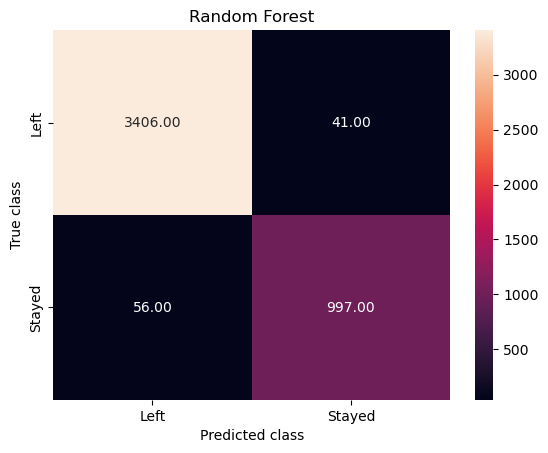

In [23]:
y_pred = rf.predict(X_test)
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
forest_cm = metrics.confusion_matrix(y_pred, y_test)
sns.heatmap(forest_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Random Forest')

In [24]:
print(classification_report(y_test, logreg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86      3462
           1       0.51      0.26      0.35      1038

    accuracy                           0.77      4500
   macro avg       0.66      0.59      0.60      4500
weighted avg       0.74      0.77      0.74      4500



Text(0.5, 1.0, 'Logistic Regression')

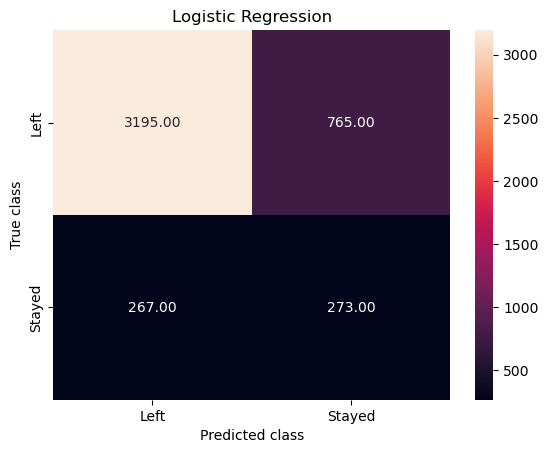

In [25]:
logreg_y_pred = logreg.predict(X_test)
logreg_cm = metrics.confusion_matrix(logreg_y_pred, y_test)
sns.heatmap(logreg_cm, annot=True, fmt='.2f',xticklabels = ["Left", "Stayed"] , yticklabels = ["Left", "Stayed"] )
plt.ylabel('True class')
plt.xlabel('Predicted class')
plt.title('Logistic Regression')

In [26]:
rf.feature_importances_

array([0.49701065, 0.19296141, 0.26493361, 0.01541432, 0.00261772,
       0.00292248, 0.00295177, 0.00244725, 0.00689596, 0.01184483])

In [27]:
X_train.head()

,satisfaction_level,last_evaluation,time_spend_company,Work_accident,promotion_last_5years,department_RandD,department_hr,department_management,salary_high,salary_low
10438,0.53,0.52,4,0,0,0,0,0,0,0
9236,0.77,0.53,3,0,0,0,0,0,0,0
818,0.89,0.79,2,0,0,0,0,0,0,0
11503,0.64,0.63,6,1,0,0,0,0,0,1
11721,0.98,0.74,3,0,0,0,0,0,0,0


In [28]:
X_train.iloc[2,:].values

array([0.89, 0.79, 2.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ])

In [29]:
y_train.head()

10438    0
9236     0
818      1
11503    0
11721    0
Name: left, dtype: int64

# deployment

In [30]:
import numpy as np
input_data=(0.89, 0.79, 2.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.   )
input_data_np = np.array(input_data)   # convert into numpy array

input_data_re = input_data_np.reshape(1,-1)    # 

pred = rf.predict(input_data_re)
print(pred)
if (pred==0):
     print("Employee stayed")
else:
     print('Employee left the Company')

[1]
Employee left the Company


D:\New folder\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [31]:
pd.DataFrame(rf.predict(X_test)).head(10)      #predicted value

,0
0,1
1,0
2,0
3,0
4,0
5,0
6,0
7,0
8,0
9,1


In [32]:
y_test.head(10)                              #actual value

1670     1
13378    0
10233    0
4719     0
7003     0
2831     0
13013    0
11978    0
8610     0
519      1
Name: left, dtype: int64

In [33]:
feature_labels = np.array(['satisfaction_level', 'last_evaluation', 'time_spend_company', 'Work_accident', 'promotion_last_5years', 
      'department_RandD', 'department_hr', 'department_management', 'salary_high', 'salary_low'])
importance = rf.feature_importances_
feature_indexes_by_importance = importance.argsort()
for index in feature_indexes_by_importance:
    print('{} - {:.2f}%'.format(feature_labels[index], (importance[index] *100.0 )))


department_management - 0.24%
promotion_last_5years - 0.26%
department_RandD - 0.29%
department_hr - 0.30%
salary_high - 0.69%
salary_low - 1.18%
Work_accident - 1.54%
last_evaluation - 19.30%
time_spend_company - 26.49%
satisfaction_level - 49.70%
